# Wrapper Methods for Feature Selection

## Objectives

- Explore different wrapper methods for feature selection to optimize model performance.
- Identify the optimal combination of features that maximizes the R2 score in a regression model.
- Compare the effectiveness of Sequential Feature Selection (both forward and backward), and Exhaustive Feature Selection.

## Background

Wrapper methods for feature selection evaluate various combinations of features, using model performance as the basis for selecting the optimal subset. These methods can significantly improve the performance of predictive models by eliminating irrelevant or less important features.

## Datasets Used

Automobile Dataset from UCI Machine Learning Repository: Includes categorical and continuous automobile variables, such as make, engine size, and price.

## Introduction

Wrapper methods evaluate multiple models using procedures that add or remove predictors to find the optimal combination that maximizes model performance.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import math

## Automobile Dataset

We will use the Automobile Data Set [https://archive.ics.uci.edu/ml/datasets/automobile] from the UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]. It includes categorical and continuous variables. 

In [2]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", 
           "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", 
           "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,...,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,...,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,...,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,...,115.0,5500.0,18,22,17450.0


### Missing Values Analysis

In [4]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [5]:
# Removing the missing values
df.dropna(inplace=True)
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Getting the numerical variables

In [6]:
# Getting the numerical variables
var_num = [col for col in df.columns if (df[col].dtype == "float64" or df[col].dtype == "int64")]
var_num

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [7]:
Xnum = df[var_num]

In [8]:
# removing price (the dependent variable)
del(Xnum['price'])
Xnum.head(3)

,symboling,normalized_losses,wheel_base,length,width,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
3,2,164.0,99.8,176.6,66.2,...,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,...,8.0,115.0,5500.0,18,22
6,1,158.0,105.8,192.7,71.4,...,8.5,110.0,5500.0,19,25


In [9]:
# price is the dependent variable
y = df.price

## Forward Selection

In [10]:
# Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(), k_features=5, forward=True, verbose=0, scoring='r2', cv=0)

- `k_features`: specifies the number of features to select
- `forward=True`: performs step forward feature selection
- `verbose`: parameter used for logging the progress of the feature selector
- `scoring`: defines the performance evaluation criteria
- `cv`: refers to cross-validation folds

In [11]:
# Use SFS to select the top 6 features 
sfs.fit(Xnum, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

In [12]:
df_F = pd.DataFrame(sfs.subsets_).T
df_F

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)",[0.7985907567612947],0.798591,"(curb_weight,)"
2,"(4, 6)",[0.8162457568403632],0.816246,"(width, curb_weight)"
3,"(4, 6, 7)",[0.8262534978374045],0.826253,"(width, curb_weight, engine_size)"
4,"(4, 6, 7, 12)",[0.8321633893107714],0.832163,"(width, curb_weight, engine_size, peak_rpm)"
5,"(3, 4, 6, 7, 12)",[0.8357155480104123],0.835716,"(length, width, curb_weight, engine_size, peak..."


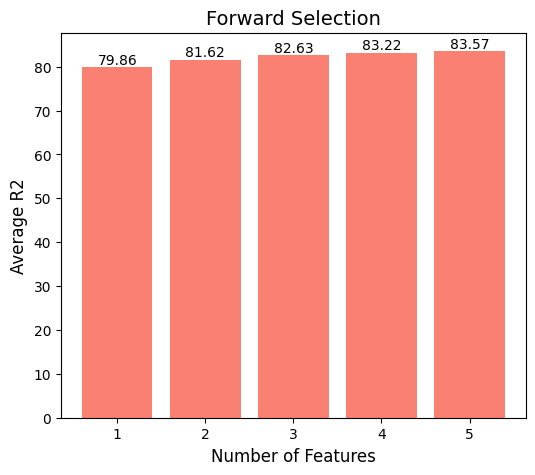

In [13]:
# Plotting the results
plt.figure(figsize=(6,5))
plt.bar(x=df_F.index, height = df_F.avg_score*100, align='center', color='salmon')
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Average R2', fontsize=12)
plt.title('Forward Selection', fontsize=14)
for i in df_F.index:
    plt.text(i, df_F.avg_score[i]*100, np.round(df_F.avg_score[i]*100,2), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10)
plt.show();

In [14]:
feat_forward = []
for i in df_F.index:
    print("Step = %d     R2 = %.2f"%(i, df_F.avg_score[i]))
    var_added = set(df_F.feature_names[i]) - set(feat_forward)
    feat_forward.append(list(var_added)[0])
    print(feat_forward)

Step = 1     R2 = 0.80
['curb_weight']
Step = 2     R2 = 0.82
['curb_weight', 'width']
Step = 3     R2 = 0.83
['curb_weight', 'width', 'engine_size']
Step = 4     R2 = 0.83
['curb_weight', 'width', 'engine_size', 'peak_rpm']
Step = 5     R2 = 0.84
['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']


In [15]:
print('Features selected:', feat_forward)

Features selected: ['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']


## Backward Elimination

Step backward feature selection is the opposite of step forward feature selection. The algorithm starts with all the model variables and drops one in each step. 

In [16]:
# Define Sequential Backward Selection with forward=False (sbs)
sbs = SFS(LinearRegression(), k_features=5, forward=False, verbose=0, scoring='r2', cv=0)

In [17]:
# Use SFS to select the top 5 features 
sbs.fit(Xnum, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(5, 5), scoring='r2')

In [18]:
df_B = pd.DataFrame(sbs.subsets_).T
df_B

,feature_idx,cv_scores,avg_score,feature_names
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0.8507607303901003],0.850761,"(symboling, normalized_losses, wheel_base, len..."
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.850751361099361],0.850751,"(symboling, normalized_losses, wheel_base, len..."
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.8507454657422958],0.850745,"(symboling, normalized_losses, wheel_base, len..."
12,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8506645318537353],0.850665,"(symboling, normalized_losses, wheel_base, len..."
11,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8505494857766761],0.850549,"(normalized_losses, wheel_base, length, width,..."
10,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.848957100789317],0.848957,"(wheel_base, length, width, curb_weight, engin..."
9,"(2, 3, 4, 6, 7, 8, 9, 10, 11)",[0.8464436291233958],0.846444,"(wheel_base, length, width, curb_weight, engin..."
8,"(2, 3, 4, 6, 7, 8, 9, 11)",[0.8443844716776634],0.844384,"(wheel_base, length, width, curb_weight, engin..."
7,"(3, 4, 6, 7, 8, 9, 11)",[0.8403389073922386],0.840339,"(length, width, curb_weight, engine_size, bore..."
6,"(4, 6, 7, 8, 9, 11)",[0.8382646985668196],0.838265,"(width, curb_weight, engine_size, bore, stroke..."


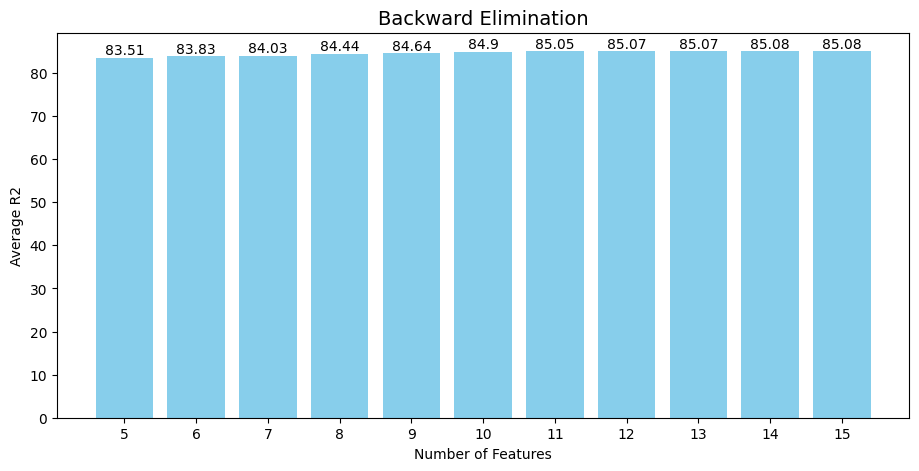

In [19]:
plt.figure(figsize=(11,5))
plt.bar(x=df_B.index, height = df_B.avg_score*100, align='center', color='skyblue')
plt.xticks(df_B.index)
plt.xlabel('Number of Features')
plt.ylabel('Average R2')
plt.title('Backward Elimination', fontsize=14)
for i in df_B.index:
    plt.text(i, df_B.avg_score[i]*100, np.round(df_B.avg_score[i]*100,2), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10);

In [20]:
features = list(df_B.feature_names[15])
for i in df_B.index:
    print("Step = %d     R2 = %.2f"%(i, df_B.avg_score[i]))
    var_deleted = set(features) - set(df_B.feature_names[i])
    print('var_deleted =',list(var_deleted))

Step = 15     R2 = 0.85
var_deleted = []
Step = 14     R2 = 0.85
var_deleted = ['highway_mpg']
Step = 13     R2 = 0.85
var_deleted = ['highway_mpg', 'city_mpg']
Step = 12     R2 = 0.85
var_deleted = ['highway_mpg', 'height', 'city_mpg']
Step = 11     R2 = 0.85
var_deleted = ['highway_mpg', 'height', 'symboling', 'city_mpg']
Step = 10     R2 = 0.85
var_deleted = ['normalized_losses', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 9     R2 = 0.85
var_deleted = ['normalized_losses', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 8     R2 = 0.84
var_deleted = ['compression_ratio', 'normalized_losses', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 7     R2 = 0.84
var_deleted = ['compression_ratio', 'normalized_losses', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'wheel_base', 'highway_mpg']
Step = 6     R2 = 0.84
var_deleted = ['compression_ratio', 'normalized_losses', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'wheel_base', 'len

In [21]:
# Printing the chosen variables
feat_backward = list(set(features) - set(var_deleted))
print('Features selected:', feat_backward)

Features selected: ['width', 'curb_weight', 'stroke', 'bore', 'engine_size']


In [22]:
print('Features in forward  method:', feat_forward)
print('Features in backward method:', feat_backward)

Features in forward  method: ['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']
Features in backward method: ['width', 'curb_weight', 'stroke', 'bore', 'engine_size']


As you can see, both selections are slightly different.

## Bidirectional search (Forward Stepwise Selection)

In [23]:
# Define Sequential Forward Selection (sfs)
sfs2 = SFS(LinearRegression(), k_features=5, forward=True, floating=True, verbose=0, scoring='r2', cv=0)

The parameters used are the same, except for:
- `floating=True`: it adds a conditional exclusion/inclusion of features to create a bi-directional selection. When `forward=True`, with every forward iteration (in Sequential Forward Selection), it also considers excluding any feature in the previous iteration to optimize performance.

In [24]:
# Use SFS to select the top features 
sfs2.fit(Xnum, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), floating=True,
                          k_features=(5, 5), scoring='r2')

In [25]:
df_FS = pd.DataFrame(sfs2.subsets_).T
df_FS

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)",[0.7985907567612947],0.798591,"(curb_weight,)"
2,"(4, 6)",[0.8162457568403632],0.816246,"(width, curb_weight)"
3,"(4, 6, 7)",[0.8262534978374045],0.826253,"(width, curb_weight, engine_size)"
4,"(4, 6, 7, 12)",[0.8321633893107714],0.832163,"(width, curb_weight, engine_size, peak_rpm)"
5,"(3, 4, 6, 7, 12)",[0.8357155480104123],0.835716,"(length, width, curb_weight, engine_size, peak..."


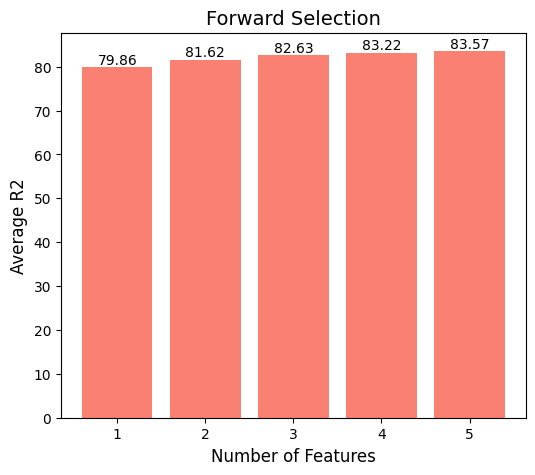

In [26]:
# Plotting the results
plt.figure(figsize=(6 ,5))
plt.bar(x=df_FS.index, height = df_FS.avg_score*100, align='center', color='salmon')
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Average R2', fontsize=12)
plt.title('Forward Selection', fontsize=14)
for i in df_FS.index:
    plt.text(i, df_FS.avg_score[i]*100, np.round(df_FS.avg_score[i]*100,2), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10)
plt.show();

In [27]:
featS_forwardS = []
for i in df_FS.index:
    print("Step = %d     R2 = %.2f"%(i, df_FS.avg_score[i]))
    var_addedS = set(df_FS.feature_names[i]) - set(featS_forwardS)
    featS_forwardS.append(list(var_addedS)[0])
    print(featS_forwardS)

Step = 1     R2 = 0.80
['curb_weight']
Step = 2     R2 = 0.82
['curb_weight', 'width']
Step = 3     R2 = 0.83
['curb_weight', 'width', 'engine_size']
Step = 4     R2 = 0.83
['curb_weight', 'width', 'engine_size', 'peak_rpm']
Step = 5     R2 = 0.84
['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']


In [28]:
print('Features selected:', feat_forward)

Features selected: ['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']


In this case, forward and stepwise selection got the same features set.

## Bidirectional search (Backward Stepwise Elimination)

In [29]:
# Define Sequential Backward Selection with forward=False (sbs)
sbs2 = SFS(LinearRegression(), k_features=5, forward=False, floating=True, verbose=0, scoring='r2', cv=0)

- `floating=True` adds a conditional exclusion/inclusion

In [30]:
# Use SFS to select the top 6 features 
sbs2.fit(Xnum, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), floating=True,
                          forward=False, k_features=(5, 5), scoring='r2')

In [31]:
df_BS = pd.DataFrame(sbs2.subsets_).T
df_BS

,feature_idx,cv_scores,avg_score,feature_names
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0.8507607303901003],0.850761,"(symboling, normalized_losses, wheel_base, len..."
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.850751361099361],0.850751,"(symboling, normalized_losses, wheel_base, len..."
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.8507454657422958],0.850745,"(symboling, normalized_losses, wheel_base, len..."
12,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8506645318537353],0.850665,"(symboling, normalized_losses, wheel_base, len..."
11,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8505494857766761],0.850549,"(normalized_losses, wheel_base, length, width,..."
10,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.848957100789317],0.848957,"(wheel_base, length, width, curb_weight, engin..."
9,"(1, 2, 3, 4, 6, 7, 8, 9, 11)",[0.8466312446168338],0.846631,"(normalized_losses, wheel_base, length, width,..."
8,"(2, 3, 4, 6, 7, 8, 9, 11)",[0.8443844716776634],0.844384,"(wheel_base, length, width, curb_weight, engin..."
7,"(4, 6, 7, 8, 9, 10, 12)",[0.8416109921102736],0.841611,"(width, curb_weight, engine_size, bore, stroke..."
6,"(4, 6, 7, 8, 9, 12)",[0.8396059394948505],0.839606,"(width, curb_weight, engine_size, bore, stroke..."


In [32]:
df_BS = pd.DataFrame(sbs2.subsets_).T
df_BS

,feature_idx,cv_scores,avg_score,feature_names
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[0.8507607303901003],0.850761,"(symboling, normalized_losses, wheel_base, len..."
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",[0.850751361099361],0.850751,"(symboling, normalized_losses, wheel_base, len..."
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.8507454657422958],0.850745,"(symboling, normalized_losses, wheel_base, len..."
12,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8506645318537353],0.850665,"(symboling, normalized_losses, wheel_base, len..."
11,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.8505494857766761],0.850549,"(normalized_losses, wheel_base, length, width,..."
10,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.848957100789317],0.848957,"(wheel_base, length, width, curb_weight, engin..."
9,"(1, 2, 3, 4, 6, 7, 8, 9, 11)",[0.8466312446168338],0.846631,"(normalized_losses, wheel_base, length, width,..."
8,"(2, 3, 4, 6, 7, 8, 9, 11)",[0.8443844716776634],0.844384,"(wheel_base, length, width, curb_weight, engin..."
7,"(4, 6, 7, 8, 9, 10, 12)",[0.8416109921102736],0.841611,"(width, curb_weight, engine_size, bore, stroke..."
6,"(4, 6, 7, 8, 9, 12)",[0.8396059394948505],0.839606,"(width, curb_weight, engine_size, bore, stroke..."


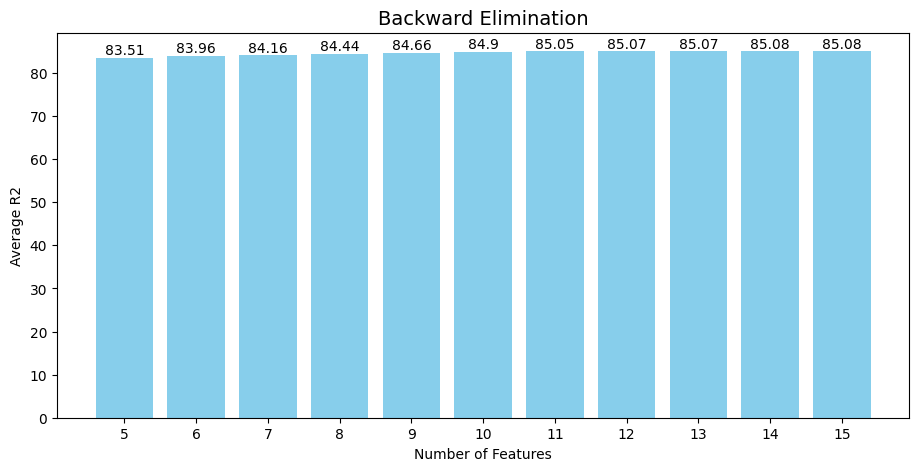

In [33]:
plt.figure(figsize=(11,5))
plt.bar(x=df_BS.index, height = df_BS.avg_score*100, align='center', color='skyblue')
plt.xticks(df_BS.index)
plt.xlabel('Number of Features')
plt.ylabel('Average R2')
plt.title('Backward Elimination', fontsize=14)
for i in df_BS.index:
    plt.text(i, df_BS.avg_score[i]*100, np.round(df_BS.avg_score[i]*100,2), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10);

In [34]:
featuresS = list(df_BS.feature_names[15])
for i in df_BS.index:
    print("Step = %d     R2 = %.2f"%(i, df_BS.avg_score[i]))
    var_deletedS = set(featuresS) - set(df_BS.feature_names[i])
    print('var_deleted =',list(var_deletedS))

Step = 15     R2 = 0.85
var_deleted = []
Step = 14     R2 = 0.85
var_deleted = ['highway_mpg']
Step = 13     R2 = 0.85
var_deleted = ['highway_mpg', 'city_mpg']
Step = 12     R2 = 0.85
var_deleted = ['highway_mpg', 'height', 'city_mpg']
Step = 11     R2 = 0.85
var_deleted = ['highway_mpg', 'height', 'symboling', 'city_mpg']
Step = 10     R2 = 0.85
var_deleted = ['normalized_losses', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 9     R2 = 0.85
var_deleted = ['compression_ratio', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 8     R2 = 0.84
var_deleted = ['compression_ratio', 'normalized_losses', 'peak_rpm', 'height', 'symboling', 'city_mpg', 'highway_mpg']
Step = 7     R2 = 0.84
var_deleted = ['normalized_losses', 'height', 'symboling', 'city_mpg', 'wheel_base', 'horsepower', 'length', 'highway_mpg']
Step = 6     R2 = 0.84
var_deleted = ['compression_ratio', 'normalized_losses', 'height', 'symboling', 'city_mpg', 'wheel_base', 'horsepower', 'length', '

In [35]:
# Printing the variables selected
feat_backwardS = list(set(featuresS) - set(var_deletedS))
print('Features selected:', feat_backwardS)

Features selected: ['width', 'curb_weight', 'stroke', 'bore', 'engine_size']


In [36]:
print('Features selected:', feat_backward)

Features selected: ['width', 'curb_weight', 'stroke', 'bore', 'engine_size']


In this case, backward and backward stepwise elimination got the same features set.

## Exhaustive Feature Selection

The exhaustive feature selection algorithm is a wrapper approach for brute-force evaluation of feature subsets. It selects the best subset by optimizing a specified performance metric given an arbitrary regressor or classifier.

The process is computationally intensive. 

In [37]:
subsets3 = math.comb(len(Xnum.columns),3)           # number of subsets of size 3
subsets4 = math.comb(len(Xnum.columns),4)           # number of subsets of size 4
subsets5 = math.comb(len(Xnum.columns),5)           # number of subsets of size 5

In [38]:
print('Number of subsets of size 3:      ', subsets3)
print('Number of subsets of size 4:     ', subsets4)
print('Number of subsets of size 5:     ', subsets5)
print('Number of subsets of size 3 to 5:', subsets3+subsets4+subsets5)

Number of subsets of size 3:       455
Number of subsets of size 4:      1365
Number of subsets of size 5:      3003
Number of subsets of size 3 to 5: 4823


In [39]:
# Define Exhaustive Feature Selection (efs)
efs = EFS(LinearRegression(), min_features=3, max_features=5, scoring='r2', cv=0)

In [40]:
# Use SFS to select the top features 
efs.fit(Xnum, y)

Features: 4823/4823

ExhaustiveFeatureSelector(cv=0, estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14]],
                          max_features=5, min_features=3, scoring='r2')

In [41]:
df_E = pd.DataFrame(efs.subsets_).T
df_E

,feature_idx,cv_scores,avg_score,feature_names
0,"(0, 1, 2)",[0.6204518180515963],0.620452,"(symboling, normalized_losses, wheel_base)"
1,"(0, 1, 3)",[0.6099636392678354],0.609964,"(symboling, normalized_losses, length)"
2,"(0, 1, 4)",[0.7258307277229896],0.725831,"(symboling, normalized_losses, width)"
3,"(0, 1, 5)",[0.21314899632974993],0.213149,"(symboling, normalized_losses, height)"
4,"(0, 1, 6)",[0.8070967569503297],0.807097,"(symboling, normalized_losses, curb_weight)"
...,...,...,...,...
4818,"(9, 10, 11, 12, 14)",[0.7437286042036377],0.743729,"(stroke, compression_ratio, horsepower, peak_r..."
4819,"(9, 10, 11, 13, 14)",[0.7387147726334917],0.738715,"(stroke, compression_ratio, horsepower, city_m..."
4820,"(9, 10, 12, 13, 14)",[0.671554619552396],0.671555,"(stroke, compression_ratio, peak_rpm, city_mpg..."
4821,"(9, 11, 12, 13, 14)",[0.6661773221946075],0.666177,"(stroke, horsepower, peak_rpm, city_mpg, highw..."


In [42]:
df_E.dtypes

feature_idx      object
cv_scores        object
avg_score        object
feature_names    object
dtype: object

In [43]:
df_E.avg_score = df_E.avg_score.astype('float')
df_E.dtypes

feature_idx       object
cv_scores         object
avg_score        float64
feature_names     object
dtype: object

In [44]:
print('The maximum score is: %.2f' %(df_E.avg_score.max()*100))
print('The index corresponding to the maximum:', df_E.avg_score.argmax())
print('The selected fearures are:', df_E.feature_names[df_E.avg_score.argmax()])

The maximum score is: 83.57
The index corresponding to the maximum: 4071
The selected fearures are: ('length', 'width', 'curb_weight', 'engine_size', 'peak_rpm')


In [45]:
print('Forward Selection Features:   ', feat_forward)
print('Backward Elimination Features:', feat_backward)

Forward Selection Features:    ['curb_weight', 'width', 'engine_size', 'peak_rpm', 'length']
Backward Elimination Features: ['width', 'curb_weight', 'stroke', 'bore', 'engine_size']


The exhaustive feature selection algorithm consists of a brute-force evaluation of feature subsets. It means it tries every possible combination of features between `min_features` and `max_features` and returns the best-performing subset. The other approaches: forward selection and backward elimination, do not guarantee to get the best subset.

## Conclusions

Key Takeaways:
- Wrapper methods, including Sequential and Exhaustive Feature Selection, effectively identify the best feature subsets for maximizing the R2 score in a regression model.
- Sequential Feature Selection, both forward and backward, demonstrated how incrementally adding or removing features can impact model accuracy, providing insights into the predictive power of individual features.
- Exhaustive Feature Selection, while computationally intensive, explores all possible feature combinations within a specified range, ensuring the identification of the optimal feature set.
- The selected features varied slightly between the different methods, highlighting the importance of method selection based on specific model requirements and computational resources.

## References

- Albon, C. (2018) Python Machine Learning Cookbook: Practical Solutions from Preprocessing to Deep Learning, O'Reilly, chapter 10
- http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/

## 